In [20]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier   

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Load data into a pandas DataFrame
train_data = pd.read_csv('training.csv', index_col='id')

# Drop the 'split' column, which has no impact on the event
train_data.drop(columns=['split'], inplace=True)

# Invert the event values to give more weight to the minority class
train_data['event'] = train_data['event'].replace({0: 1, 1: 0})

# Extract the target column
train_target = train_data['event']

# Fill missing values with the mean
train_data.fillna(train_data.mean(), inplace=True)

#Prepare data use in ML algorithms
X = train_data.drop('event', axis=1).values
y = train_target.values

# Print out the percentage of samples that have the event
print('Default %:', train_target.sum() / train_target.shape[0] * 100)


Default %: 2.5255824080121925


In [22]:
import pandas as pd
from sklearn import preprocessing

# Load test data into a pandas DataFrame
test_data = pd.read_csv('test.csv', index_col='id')

# Drop the 'split' column, which has no impact on the event
test_data.drop(columns=['split'], inplace=True)

# Invert the event values to give more weight to the minority class
test_data['event'] = test_data['event'].replace({0: 1, 1: 0})

# Extract the target column
test_target = test_data['event']

# Fill missing values with the mean from the training data
test_data.fillna(train_data.mean(), inplace=True)

X_test = test_data.drop('event', axis=1).values
y_test = test_target.values

# Print out the percentage of samples that have the event
print('Default %:', test_target.sum() / test_target.shape[0] * 100)


Default %: 2.5004605670836892


Number of class 1 examples before: (6032, 8)
Number of class 1 examples after: (232804, 8)
(238836, 8)
(232804, 8)
(238836,)
(232804,)


(array([232804.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 232804.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

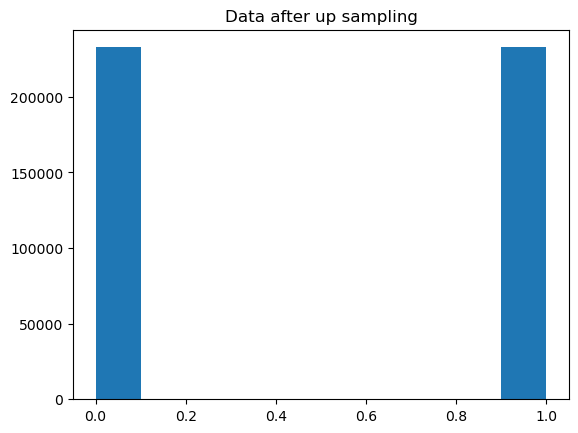

In [23]:
#Up-sampling - address class imbalance / prevent bias toward majority class
from sklearn.utils import resample


X_train=train_data.drop("event" ,axis= 1)
y_train=train_target

print('Number of class 1 examples before:', X_train[y_train == 1].shape)



X_upsampled, y_upsampled = resample(X_train[y_train == 1],
                                    y_train[y_train == 1],
                                    replace=True,
                                    n_samples=X_train[y_train == 0].shape[0],
                                    random_state=123)

print('Number of class 1 examples after:', X_upsampled.shape)
#print('Number of class 1 examples after:', y_upsampled.shape)

#UPSAMPLE


print(X_train.shape)
print(X_upsampled.shape)
print(y_train.shape)
print(y_upsampled.shape)

X_bal = np.vstack((X_train[y_train==0], X_upsampled))
y_bal = np.hstack((y_train[y_train==0], y_upsampled))

#check the data label balance
plt.title('Data after up sampling')
plt.hist(y_bal)

(465608, 8)
(59709, 8)
(465608,)
(59709,)


(array([232804.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 232804.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

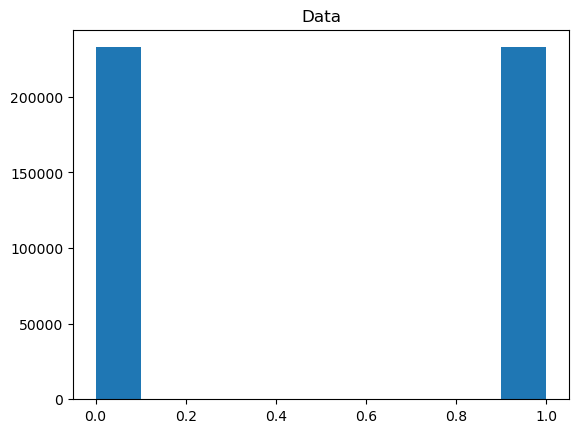

In [24]:
from sklearn.model_selection import train_test_split

X_train=X_bal
X_test
y_train=y_bal
y_test

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

plt.title('Data')
plt.hist(y_train)

In [25]:
X_train=pd.DataFrame(X_train,columns=train_data.columns[1:])
X_test=pd.DataFrame(X_test,columns=train_data.columns[1:])

In [26]:
#Logistic Regression
from itertools import combinations

def find_best_combination(X_train, X_test, y_train, y_test):
    best_accuracy = 0
    best_combination = []
    for i in range(1, len(X_train.columns)+1):
        for combination in combinations(X_train.columns, i):
            X_train_combination = X_train[list(combination)]
            X_test_combination = X_test[list(combination)]
            model = LogisticRegression()
            model.fit(X_train_combination, y_train)
            y_pred = model.predict(X_test_combination)
            accuracy = accuracy_score(y_test, y_pred)
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_combination = list(combination)
    return best_accuracy, best_combination


In [27]:
best_accuracy, best_combination = find_best_combination(X_train, X_test, y_train, y_test)
print("Best combination of variables:", best_combination)
print("Accuracy:", best_accuracy)


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Best combination of variables: ['var2', 'var4']
Accuracy: 0.9749953943291632


In [28]:
#Decision Tree
from itertools import combinations

def find_best_combination(X_train, X_test, y_train, y_test):
    best_accuracy = 0
    best_combination = []
    for i in range(1, len(X_train.columns)+1):
        for combination in combinations(X_train.columns, i):
            X_train_combination = X_train[list(combination)]
            X_test_combination = X_test[list(combination)]
            model = DecisionTreeClassifier()
            model.fit(X_train_combination, y_train)
            y_pred = model.predict(X_test_combination)
            accuracy = accuracy_score(y_test, y_pred)
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_combination = list(combination)
    return best_accuracy, best_combination


In [29]:
best_accuracy, best_combination = find_best_combination(X_train, X_test, y_train, y_test)
print("Best combination of variables:", best_combination)
print("Accuracy:", best_accuracy)


Best combination of variables: ['var7']
Accuracy: 0.9503424944313252


In [14]:
#Random Forest
from itertools import combinations
from sklearn.ensemble import RandomForestClassifier

def find_best_combination(X_train, X_test, y_train, y_test):
    best_accuracy = 0
    best_combination = []
    for i in range(1, len(X_train.columns)+1):
        for combination in combinations(X_train.columns, i):
            X_train_combination = X_train[list(combination)]
            X_test_combination = X_test[list(combination)]
            model = RandomForestClassifier()
            model.fit(X_train_combination, y_train)
            y_pred = model.predict(X_test_combination)
            accuracy = accuracy_score(y_test, y_pred)
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_combination = list(combination)
    return best_accuracy, best_combination


In [15]:
best_accuracy, best_combination = find_best_combination(X_train, X_test, y_train, y_test)
print("Best combination of variables:", best_combination)
print("Accuracy:", best_accuracy)


KeyboardInterrupt: 